In [1]:
# importing important library
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [2]:
# loading datasets
iris = datasets.load_iris() # Bunch object
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
# list all the directory in iris
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [4]:
# loading data in data
data = iris.data # np.array

# printing dimensions of data
print("Dimensions:")
print(data.shape)

# printing first 5 samples
print("---")
print("First 5 samples:")
print(data[:5,:])

# printing all the features names
print("---")
print("Feature names:")
print(iris.feature_names)

Dimensions:
(150, 4)
---
First 5 samples:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
---
Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
pca = PCA(n_components=3) # three components
pca.fit(data) # run PCA, putting in raw version for fun

print("Principal components:")
print(pca.components_)

print("---")
print("Compressed - 4D to 3D:")
print(pca.transform(data)[:5,:]) # first 5 obs

# transformed 3d data stored in data_transformed
data_transformed= pca.transform(data)[:,:]

print("---")
print("Reconstructed - 3D to 4D:")
print(pca.inverse_transform(pca.transform(data))[:5,:]) # first 5 obs

Principal components:
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]]
---
Compressed - 4D to 3D:
[[-2.68420713  0.32660731 -0.02151184]
 [-2.71539062 -0.16955685 -0.20352143]
 [-2.88981954 -0.13734561  0.02470924]
 [-2.7464372  -0.31112432  0.03767198]
 [-2.72859298  0.33392456  0.0962297 ]]
---
Reconstructed - 3D to 4D:
[[5.09968079 3.50032609 1.40048267 0.19924425]
 [4.86840068 3.03228058 1.44778117 0.12518657]
 [4.69387555 3.20625649 1.30926076 0.18549996]
 [4.62409716 3.07538332 1.46356281 0.25705157]
 [5.02002788 3.57954033 1.36971595 0.24741729]]


In [6]:
# printing top 5 rows of transformed data
data_transformed[:5]

array([[-2.68420713,  0.32660731, -0.02151184],
       [-2.71539062, -0.16955685, -0.20352143],
       [-2.88981954, -0.13734561,  0.02470924],
       [-2.7464372 , -0.31112432,  0.03767198],
       [-2.72859298,  0.33392456,  0.0962297 ]])

In [7]:
# target class of iris dataset
data_class = iris.target
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

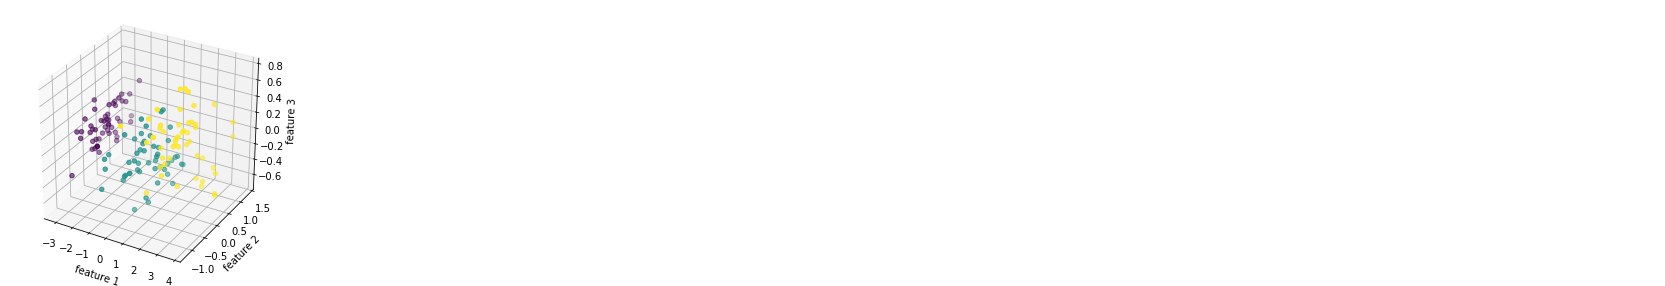

In [8]:
# importing library for 3d visulaization
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# ploting the figure
fig = plt.figure(figsize=(5.,5.))
ax = fig.add_subplot(111, projection='3d')

# defining the x y and z axis
x =data_transformed[:,0]
y =data_transformed[:,1]
z =data_transformed[:,2]


# plotting the scatter plot
ax.scatter(x, y, z, marker='o',c=data_class)

# adding labels to the axis
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('feature 3')

plt.show()